In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Directory with training horse pictures
train_horse_dir = os.path.join('./data/horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./data/horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./data/validation-horse-or-human/horses')

# Directory with training human pictures
validation_human_dir = os.path.join('./data/validation-horse-or-human/humans')

In [2]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse48-2.png', 'horse07-7.png', 'horse42-9.png', 'horse06-8.png', 'horse24-2.png', 'horse14-7.png', 'horse27-0.png', 'horse45-9.png', 'horse31-8.png', 'horse48-5.png']
TRAIN SET HUMANS: ['human06-08.png', 'human12-25.png', 'human15-19.png', 'human07-24.png', 'human16-30.png', 'human02-27.png', 'human02-01.png', 'human09-11.png', 'human12-08.png', 'human16-14.png']
VAL SET HORSES: ['horse6-403.png', 'horse4-014.png', 'horse3-171.png', 'horse4-302.png', 'horse1-204.png', 'horse3-584.png', 'horse6-198.png', 'horse1-554.png', 'horse3-498.png', 'horse4-495.png']
VAL SET HUMANS: ['valhuman01-19.png', 'valhuman05-12.png', 'valhuman05-08.png', 'valhuman04-18.png', 'valhuman03-20.png', 'valhuman02-07.png', 'valhuman04-02.png', 'valhuman01-09.png', 'valhuman03-08.png', 'valhuman02-20.png']


In [3]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

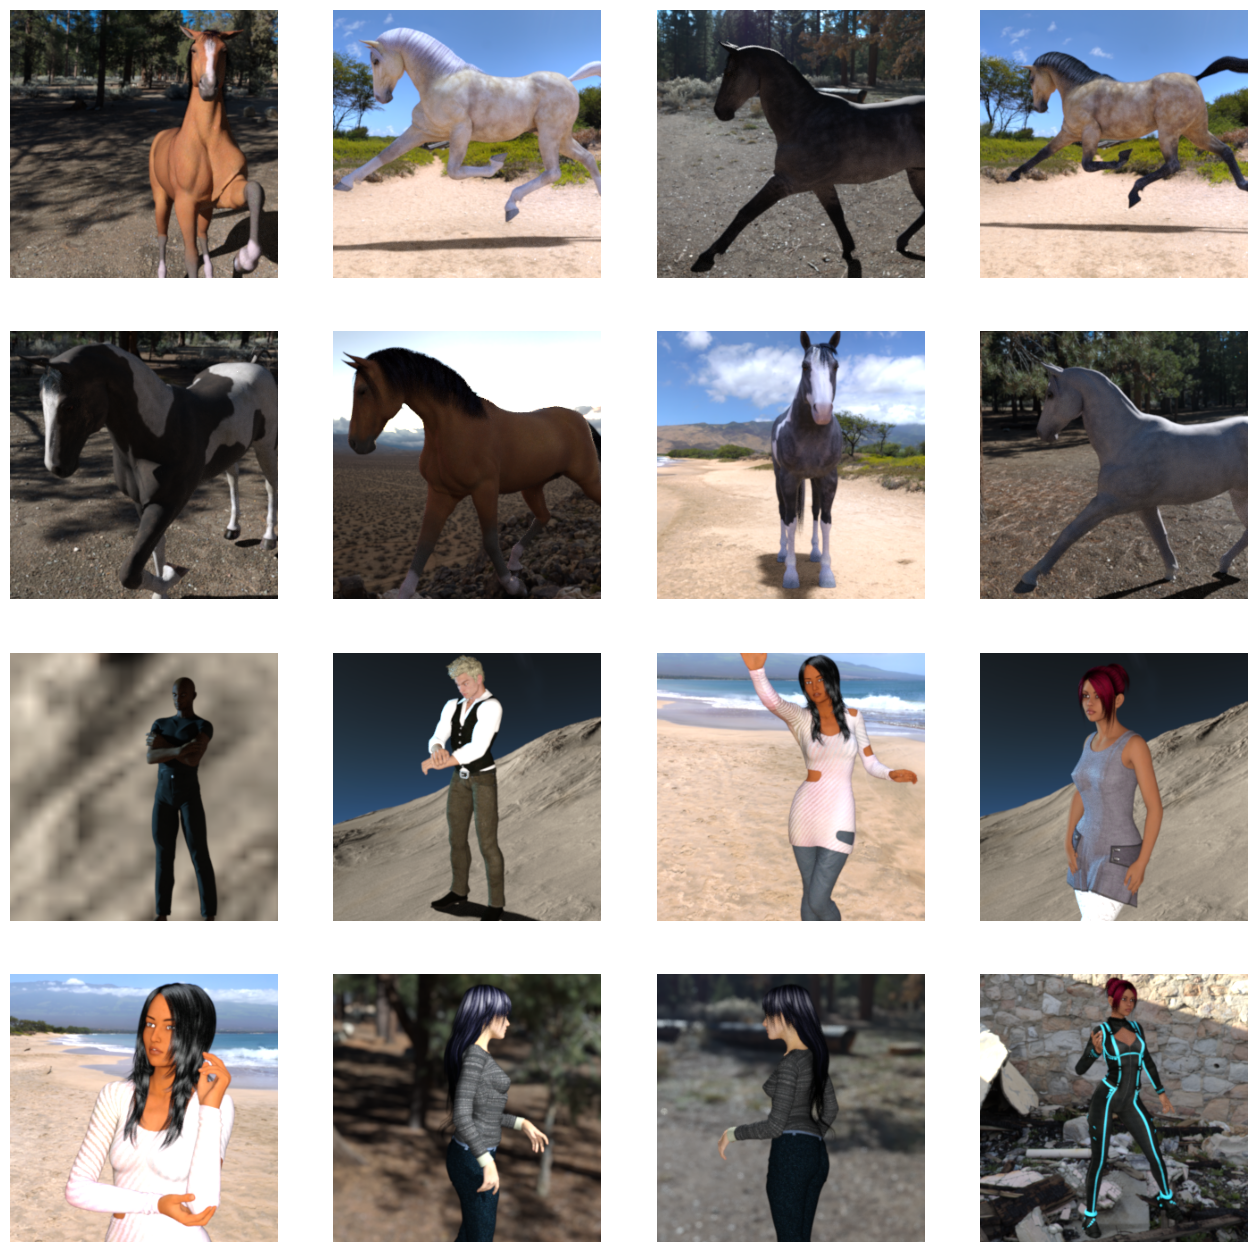

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
# Build a small model from scratch
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
# Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# All images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './data/horse-or-human', # This is the source directory for training images
    target_size = (300,300), # All images will be resized to 300x300
    batch_size = 128,
    class_mode='binary' # Since you use binary_crossentropy loss, you need binary labels
)

# Flow validation images in batches 128 using validation_datagen generator
validation_generator = train_datagen.flow_from_directory(
    './data/validation-horse-or-human', # This is the source directory for training images
    target_size = (300,300), # All images will be resized to 300x300
    batch_size = 128,
    class_mode='binary' # Since you use binary_crossentropy loss, you need binary labels
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [20]:
# Training
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 9s 516ms/step - loss: 0.7940 - accuracy: 0.5150 - val_loss: 0.6317 - val_accuracy: 0.8203
Epoch 2/15
8/8 [==============================] - 3s 388ms/step - loss: 1.5479 - accuracy: 0.6307
Epoch 3/15
8/8 [==============================] - 3s 391ms/step - loss: 0.5448 - accuracy: 0.6730
Epoch 4/15
8/8 [==============================] - 3s 375ms/step - loss: 0.5658 - accuracy: 0.8042
Epoch 5/15
8/8 [==============================] - 3s 401ms/step - loss: 0.3363 - accuracy: 0.8521
Epoch 6/15
8/8 [==============================] - 3s 403ms/step - loss: 0.3720 - accuracy: 0.8331
Epoch 7/15
8/8 [==============================] - 4s 480ms/step - loss: 0.2071 - accuracy: 0.9336
Epoch 8/15
8/8 [==============================] - 4s 424ms/step - loss: 0.0963 - accuracy: 0.9666
Epoch 9/15
8/8 [==============================] - 4s 424ms/step - loss: 0.3118 - accuracy: 0.8665
Epoch 10/15
8/8 [==============================] - 4s 417ms/step - loss: 0.2

In [22]:
import cv2
import numpy as np

./data/horse-or-human/horses/horse03-0.png is a horse


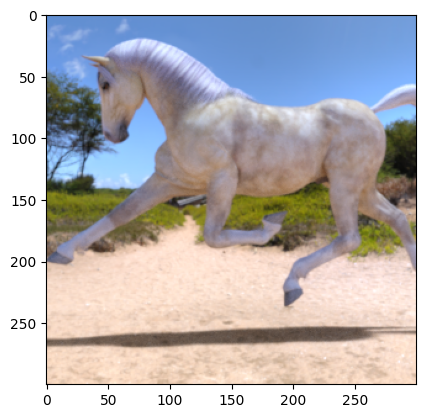

In [49]:
# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (300,300), interpolation = cv2.INTER_LINEAR)
x = img/255
x = np.expand_dims(x,axis=0)

pred = model.predict(x, batch_size=10)

if pred > 0.5:
    print(img_path + " is a human")
else:
    print(img_path + " is a horse")

plt.imshow(img)

/tmp/ipykernel_11601/846085612.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/tmp/ipykernel_11601/846085612.py:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


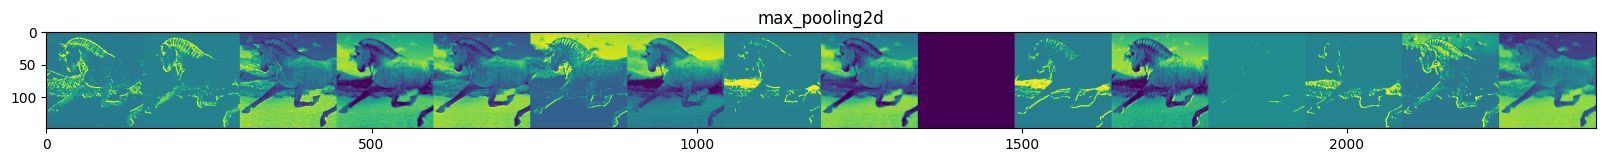

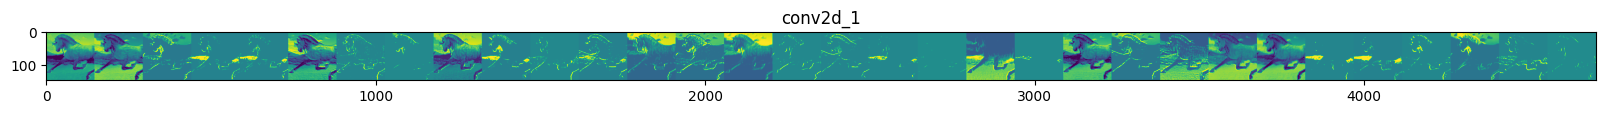

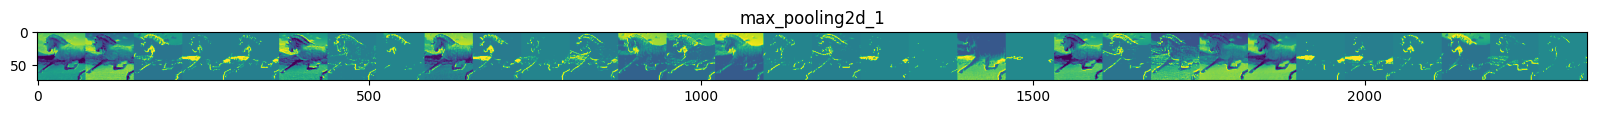

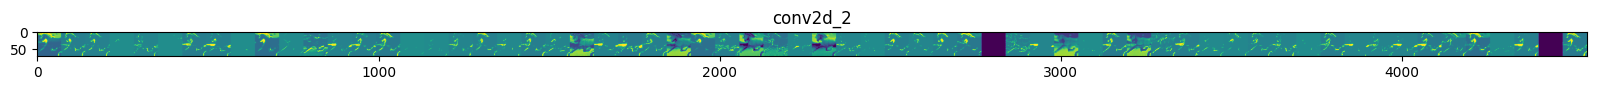

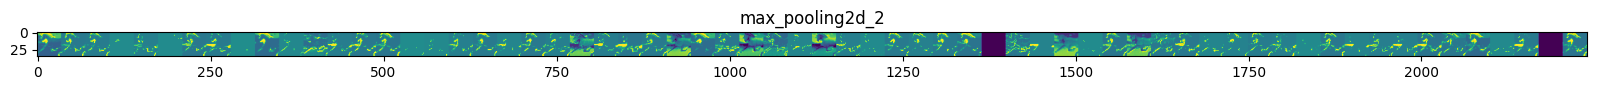

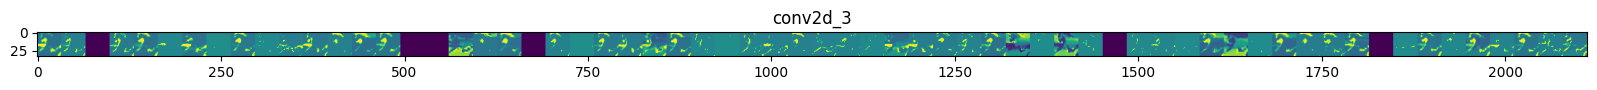

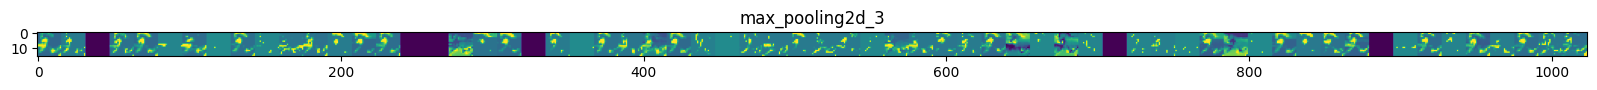

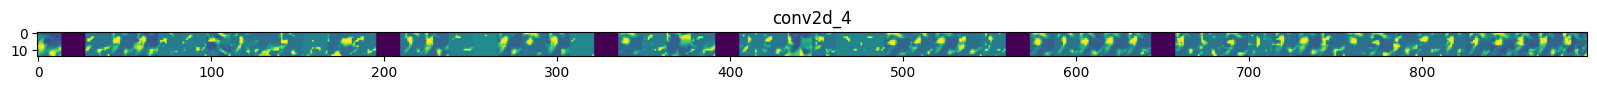

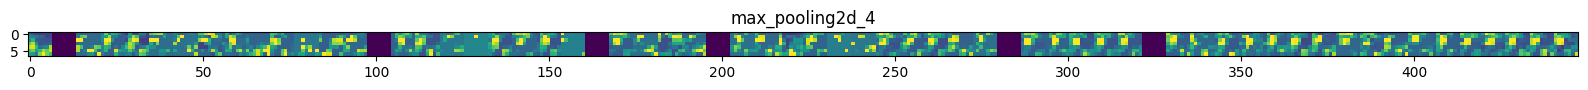

In [50]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')